## Correlations

**Linear Multicollinearity investigation**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("hw1_dataset.csv")


Firstly let's check correlation matrix for pearson coefficient 

In [35]:
correlations_df = df.iloc[:, 11:].corr(method="pearson").abs()


<AxesSubplot: >

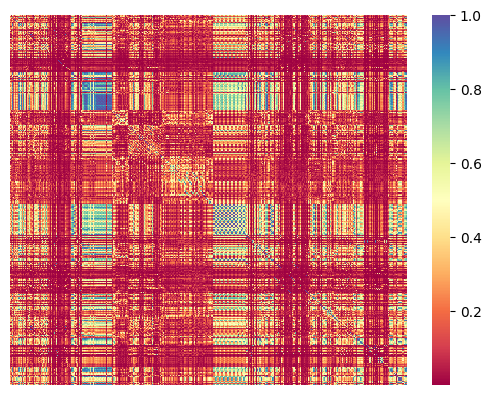

In [36]:
sns.heatmap(correlations_df, cmap="Spectral", yticklabels=False, xticklabels=False)


Correlation matrix shows correlation coefficients between each column in df, but i this case it is not very informative, we can see that some variables are correlated, some not. Let's remove all columns which are highly correlated.

In [37]:
# First choose upper triangle
triangle = correlations_df.where(np.triu(np.ones(correlations_df.shape), k=1) != 0)


In [38]:
# Check all correlated columns
correlated_columns = [
    column for column in triangle.columns if any((triangle[column] > 0.5))
]


In [39]:
# Now we can remove these columns
low_correlation = df.drop(correlated_columns, axis=1)


<AxesSubplot: >

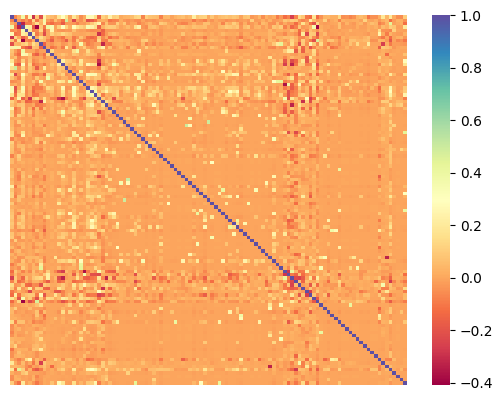

In [40]:
# Now let's plot correlation matrix in this case
low_correlations_df = low_correlation.iloc[:, 11:].corr(method="pearson")
sns.heatmap(low_correlations_df, cmap="Spectral", yticklabels=False, xticklabels=False)


In [41]:
low_correlations_df.columns.shape[0]
# Still a lot of columns, but at least we can see that most are not correlated at all


109

*Non-linear correlations*

We can also check if some of these columns are still non-linearly correlated by utilizing spearman coefficient

In [42]:
correlations_df_spearman = low_correlations_df.iloc[:, 11:].corr(method="spearman")


<AxesSubplot: >

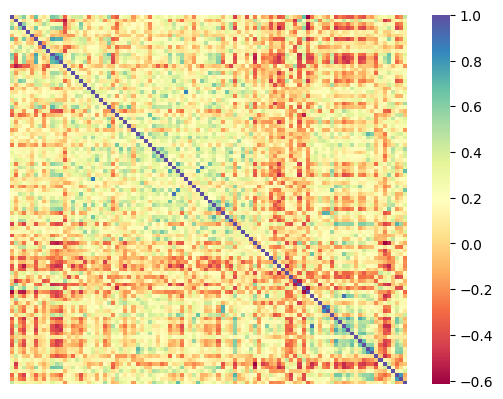

In [43]:
sns.heatmap(
    correlations_df_spearman, cmap="Spectral", yticklabels=False, xticklabels=False
)


We can see that there are some strong positive and negative non-linear correlations, we can get rid of them too

<AxesSubplot: >

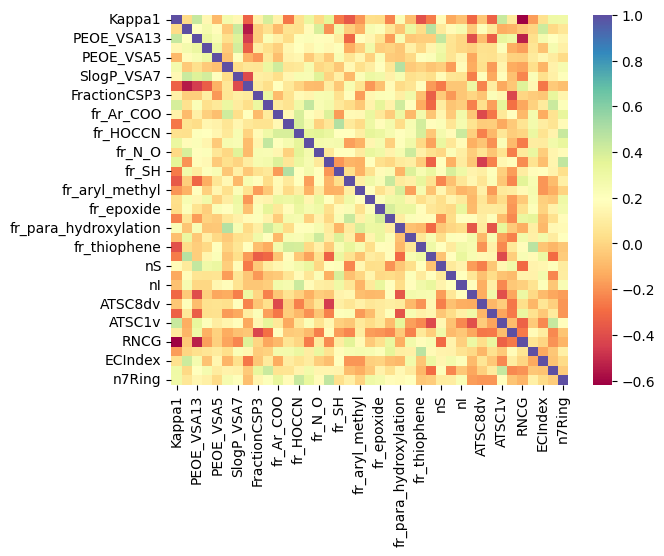

In [44]:
# First choose upper triangle
triangle = correlations_df_spearman.where(
    np.triu(np.ones(correlations_df_spearman.shape), k=1) != 0
)

# Check all correlated columns
correlated_columns = [
    column for column in triangle.columns if any((triangle[column] > 0.5))
]

# Now we can remove these columns
low_correlation = low_correlations_df.drop(correlated_columns, axis=1)

# Now let's plot correlation matrix in this case
low_correlations_df = low_correlation.iloc[:, 11:].corr(method="spearman")
sns.heatmap(low_correlations_df, cmap="Spectral")


We can see that out of all values there aren't many completely non-correlated ones. No wonder, >2000 descriptors means that most of them are just transformed other descriptors. But it is not very important, as we still have to use >1000 descriptors dataset

## Linear dimension reduction method

There aren't many linear dimension reduction methods that are very distinct from PCA. LDA is for classification, ICA isn't very interpretable and is rarely used in python except for analysis of signals, other implementations of this algorithm in python are quite poor. We still have a good option, which is singular value decomposition. It is widely used in linear algebra and ml and it is quite similar to PCA, but it's faster for big datasets.

In [3]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


In [4]:
# As always split dataset
df_desc = df.iloc[:, 11:]
df_info = df.iloc[:, :11]


We can also choose columns that we later will check for correlation with components

In [5]:
print(list(df_desc.columns))


['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', '

In [6]:
# These are the columns that i think may be important

interesting_columns = [
    "MW",
    "Radius",
    "apol",
    "RNCG",
    "RPCG",
    "BalabanJ",
    "nH",
    "nAtom",
    "SLogP",
    "nAcid",
    "nBase",
]


We can start with 100 components and then decide based on explained variance

In [7]:
num_of_components = 100


In [8]:
svd = TruncatedSVD(n_components=num_of_components)
df_svd = svd.fit_transform(df_desc)
cum_expl_var = np.cumsum(svd.explained_variance_ratio_)
n_comp_i = np.arange(1, num_of_components + 1, step=1)


In [9]:
variance_df = pd.DataFrame(
    np.array([n_comp_i, cum_expl_var]).T,
    columns=["number_of_components", "explained_variance"],
)


Text(0.5, 1, 'Explained variance: 95%')

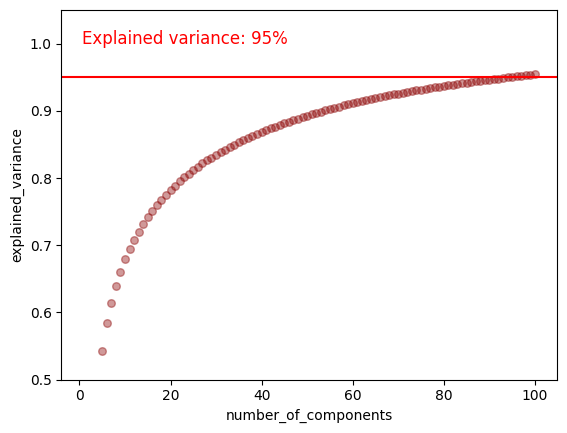

In [10]:
# plot results
plt.ylim(0.5, 1.05)
sns.regplot(
    variance_df,
    x="number_of_components",
    y="explained_variance",
    scatter_kws={"color": "darkred", "alpha": 0.4, "s": 30},
    fit_reg=False,
)
plt.axhline(y=0.95, color="r", linestyle="-")
plt.text(0.5, 1, "Explained variance: 95%", color="red", fontsize=12)


100 components fits just right, let's make df out of it and then make correlation matrix to try to decypher our components

In [11]:
df_pc = pd.DataFrame(data=df_svd, columns=[f"SV{i}" for i in range(1, 101)])


<AxesSubplot: >

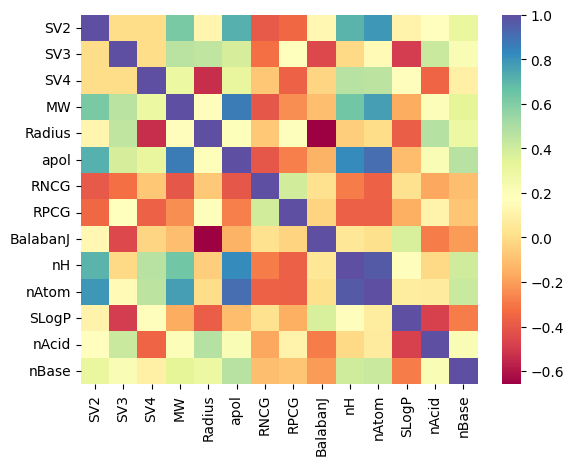

In [57]:
corr_comp = pd.concat(
    [
        df_pc[["SV2", "SV3", "SV4"]],
        pd.DataFrame(df_desc[interesting_columns], columns=interesting_columns),
    ],
    axis=1,
)
sns.heatmap(
    corr_comp.corr(),
    cmap="Spectral",
)


Here we can see that singular component 2 is negatively correlated with RNCG (relative negative charge) and positively correlated with nAtom (number of all atoms)
Singular component 3 is negatively correlated with BalabanJ (Balaban’s J index), SLogP (Wildman-Crippen LogP)
Singular component 4 is negatively correlated with Radius and nAcid (acidic group count)

We can also plot all of our samples in a space of two components just to see if there is some interesting information

Let's make a plot with SV1 and SV4 as axis and molecular weight as color

In [60]:
Mol_weight = df_desc["MW"]

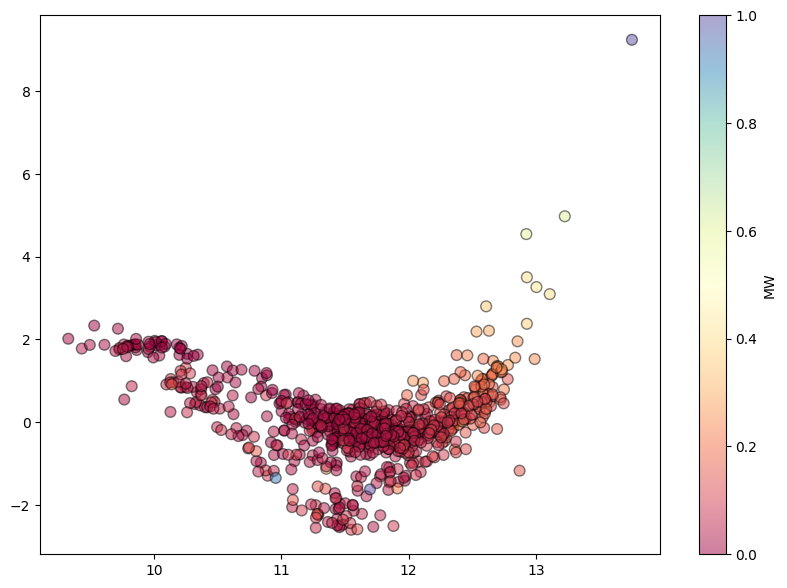

In [38]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
scatter = ax.scatter(
    df_svd[:, 0],
    df_svd[:, 3],
    c=Mol_weight,
    s=60,
    edgecolors="black",
    cmap="Spectral",
    alpha=0.5,
)
colorbar = fig.colorbar(scatter, ax=ax, label="MW")


We can clearly see some kind of relationship between components and molecular mass on this plot

Let's make a plot with SV1 and SV4 as axis and raw value as color

In [66]:
Raw_value = pd.to_numeric(df_info["raw_value"], errors="coerce")

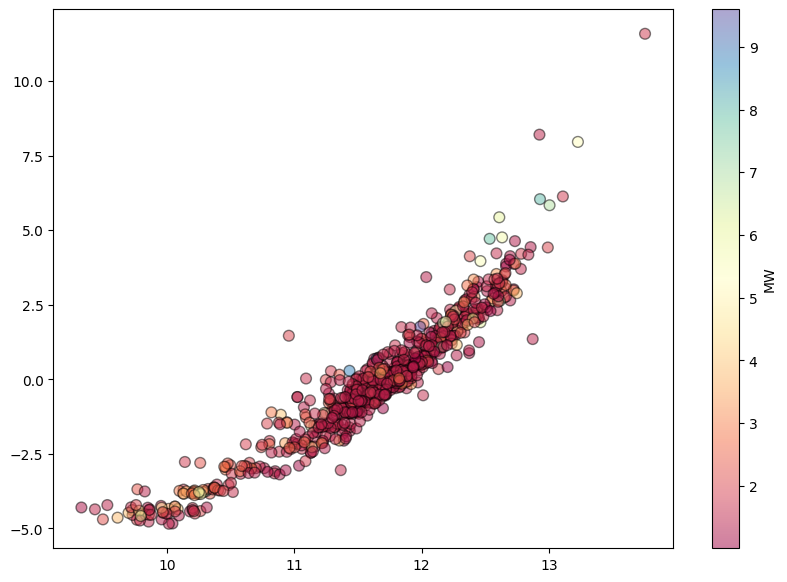

In [46]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
scatter = ax.scatter(
    df_svd[:, 0],
    df_svd[:, 1],
    c=Raw_value,
    s=60,
    edgecolors="black",
    cmap="Spectral",
    alpha=0.5,
)
colorbar = fig.colorbar(scatter, ax=ax, label="MW")


No clear relationship here, maybe we will see it after we apply clustering techniques

## Non-linear dimension reduction method

One of the most popular methods for non-linear dimension reduction is t-SNE (T-distributed Stochastic Neighbor Embedding). It should be good for our data, as it's suitable for high dimension data and robust to noise. We can also optimize perplexity variable in this method, let's make several plots.

In [72]:
from sklearn.manifold import TSNE


We will use color to show molecular weight

c:\Users\Ivan\mambaforge-pypy3\envs\py39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Ivan\mambaforge-pypy3\envs\py39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Ivan\mambaforge-pypy3\envs\py39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Ivan\mambaforge-pypy3\envs\py39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


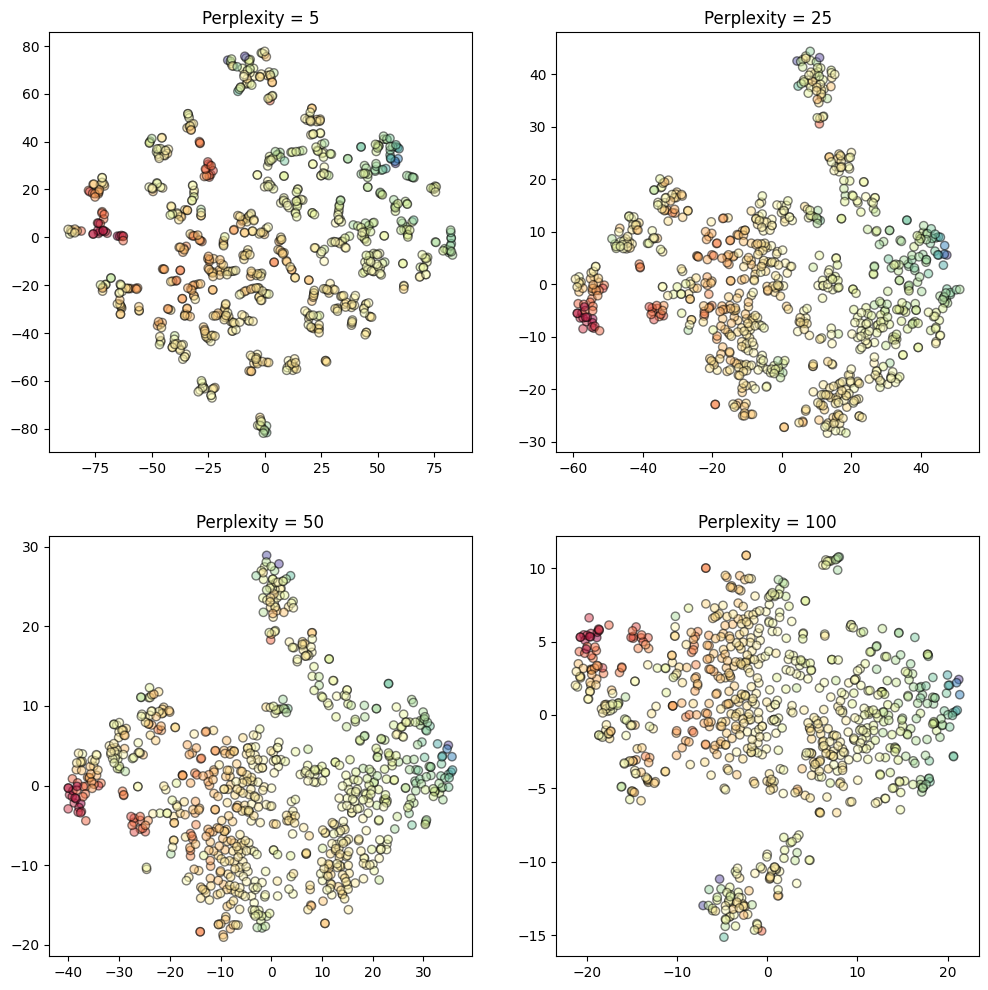

In [81]:
plt.figure(figsize=(12, 12))

for index, p in enumerate([5, 25, 50, 100]):

    # perform t-SNE
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    tsne_df = tsne.fit_transform(df_desc)

    tsne_df = pd.DataFrame(tsne_df, columns=["tsne1", "tsne2"])

    # plot the results
    plt.subplot(2, 2, index + 1)
    plt.scatter(
        tsne_df["tsne1"],
        tsne_df["tsne2"],
        c=np.log(Mol_weight),
        edgecolors="black",
        cmap="Spectral",
        alpha=0.5,
    )
    plt.title("Perplexity = " + str(p))


We can see that with almost all values of perplexity there is a relationship between tsne components and molecular mass